# Module 4 Time Series Project
Student: Alice 
<br>Instructor: Eli Thomas

This project is based off data from kaggle on the number of covid patients in different countries.

The purpose of this project will be to practice the basics of how to approach a time series project. Therefore we won't be focusing so much on the data at hand but how to call and use arima and fbprophet. 
We mention this because we shorten our data significantly to use arima and a different example data to use fbprophet. 

To be continued:
A more 'advanced' study of this data will be provided soon...

In [373]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import datetime 

import pycountry
import plotly.express as px

In [374]:
data = pd.read_csv('covid_data.csv')

In [375]:
data

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.861660,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.861660,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.861660,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
3,Beijing,China,35.861660,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
4,Chongqing,China,35.861660,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
...,...,...,...,...,...,...,...,...,...,...,...,...
24786,Nebraska,US,37.090240,-95.712891,5,0.0,0.0,3/11/2020 23:13,jhu,USA,Americas,https://www.countryflags.io/us/flat/64.png
24787,NaN,Reunion,NaN,NaN,1,0.0,0.0,3/11/2020 23:13,jhu,NaN,NaN,NaN
24788,NaN,Cote d'Ivoire,NaN,NaN,1,0.0,0.0,3/11/2020 23:33,jhu,CIV,Africa,https://www.countryflags.io/ci/flat/64.png
24789,NaN,Greece,39.074208,21.824312,99,1.0,0.0,3/11/2020 23:53,jhu,GRC,Europe,https://www.countryflags.io/gr/flat/64.png


In [376]:
data.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
3,Beijing,China,35.86166,104.195397,36,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
4,Chongqing,China,35.86166,104.195397,27,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png


## Cleaning Data

In [377]:
data = data.drop('country_flag', axis =1)

In [378]:
data['update_time'] = pd.to_datetime(data['update_time'])

In [379]:
data['update_date'] = data['update_time'].dt.date

In [380]:
df = data[data.data_source=='jhu']
df_agg = df.groupby('update_date').agg({'confirmed_cases':'sum','deaths':'sum','recovered':'sum'}).reset_index()

In [381]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_agg['update_date'],
                y=df_agg['confirmed_cases'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=df_agg['update_date'],
                y=df_agg['deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=df_agg['update_date'],
                y=df_agg['recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths, Recovered',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [382]:
data = data[(data['country'] != 'Others') & (data['country'] != 'Undisclosed')]

In [383]:
print("\nTotal countries affected by COVID-19: ",len(data.country.unique()))


Total countries affected by COVID-19:  138


## Exploring Data

We take the latest date/ timestamp, and create a new dataframe to only include the latest day data. 

In [384]:
from datetime import date
latest_date = data['update_time'].max()

year = latest_date.year
month = latest_date.month
# adjust for timezone
day = latest_date.day - 1


data_latest = data[data['update_time'] > pd.Timestamp(date(year,month,day))]

In [385]:
# Creating a dataframe with total no of confirmed cases for every country as of the latest available date
affected_country_latest = data_latest.groupby(['country','country_code','region','latitude','longitude']).agg({'update_time': np.max}).reset_index()
key = ['country','country_code','region','latitude','longitude','update_time']
global_cases = pd.merge(data_latest, affected_country_latest, how='inner', on=key).drop_duplicates().groupby(key).max().sort_values(by=['confirmed_cases'],ascending=False).reset_index()
global_cases.index+=1
global_cases_columns = global_cases.columns.tolist()
global_cases_columns.remove('update_time')
global_cases = global_cases[global_cases_columns]

In [386]:
global_cases.head()

,country,country_code,region,latitude,longitude,province,confirmed_cases,deaths,recovered,data_source,update_date
1,Italy,ITA,Europe,41.871940,12.567380,NaN,12462,827.0,1045.0,jhu,2020-03-11
2,Iran,IRN,Asia,32.427908,53.688046,NaN,9000,354.0,2959.0,jhu,2020-03-11
3,France,FRA,Europe,46.227638,2.213749,France,2281,48.0,12.0,jhu,2020-03-11
4,Spain,ESP,Europe,40.463667,-3.749220,NaN,2277,54.0,183.0,jhu,2020-03-11
5,Germany,DEU,Europe,51.165691,10.451526,NaN,1908,3.0,25.0,jhu,2020-03-11


In [387]:
import folium 

In [388]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
world_geo = f'{url}/world-countries.json'

m = folium.Map(location=[35.86166,104.195397], zoom_start=3,tiles='Stamen Toner')

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=global_cases,
    columns=['country', 'confirmed_cases'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Confirmed Cases'
).add_to(m)

for lat, lon, value, name in zip(global_cases['latitude'], global_cases['longitude'], global_cases['confirmed_cases'], global_cases['country']):
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                 '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),        
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

folium.LayerControl().add_to(m)

m

In [389]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Mainland China
key = ['province','country']
China = data_latest[data_latest['country']=='China'].groupby(key).agg({'confirmed_cases':np.max,'deaths':np.max,'recovered':np.max,'update_date':np.max}).fillna(0).reset_index()
China['log_confirmed_cases'] = np.log(China['confirmed_cases'])
China['log_recovered'] = np.log(China['recovered'])
China['log_deaths'] = np.log(China['deaths'])
China['norm_confirmed_cases'] = scaler.fit_transform(China[['confirmed_cases']])
China['norm_recovered'] = scaler.fit_transform(China[['recovered']])
China['norm_deaths'] = scaler.fit_transform(China[['deaths']])
China = China.sort_values(by='confirmed_cases',ascending=False)

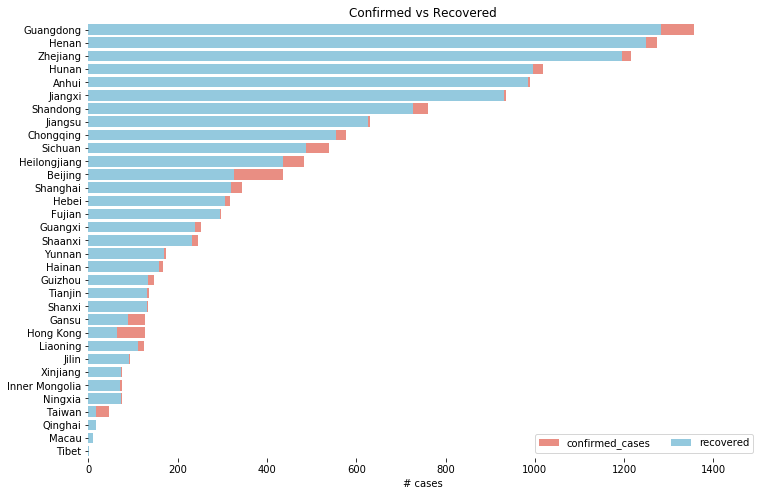

In [390]:
f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")

sns.barplot(x="confirmed_cases", y="province", data=China[1:],
            label="confirmed_cases", color="salmon")

sns.set_color_codes("muted")
sns.barplot(x="recovered", y="province", data=China[1:],
            label="recovered", color ='skyblue')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500), ylabel="",xlabel="# cases",title="Confirmed vs Recovered")
sns.despine(left=True, bottom=True)

## Time Series on Provinces of China 

In [391]:
China_df = data[data['country']=='China']

### Data Cleaning 

In [392]:
China_df = China_df.drop('recovered', axis = 1)
China_df = China_df.drop_duplicates()

We are interested in the number of cases, we will drop recovery as significant portion of our data is missing. We will also fill missing values (2 missing: latitude and longitude for Hong Kong and Taiwan).

In [393]:
China_df.fillna(0, inplace = True)

In [394]:
missing = China_df[(China_df['latitude'] == 0) & (China_df['longitude'] == 0)]

In [395]:
missing

,province,country,latitude,longitude,confirmed_cases,deaths,update_time,data_source,country_code,region,update_date
24589,Taiwan,China,0.0,0.0,47,1.0,2020-03-10 19:13:00,jhu,CHN,Asia,2020-03-10
24614,Hong Kong,China,0.0,0.0,120,3.0,2020-03-10 23:53:00,jhu,CHN,Asia,2020-03-10


Missing latitude and Longitude 
<br>Taiwan: 23.6978 latitude, 120.9605 longitude
<br>Hong Kong: 22.3193 latitude, 114.1694 longitude 

In [396]:
#changing to list of lists 
df_to_list = China_df.to_numpy().tolist()

In [397]:
for x in df_to_list:
    if x[0] == 'Taiwan':
        x[2] = 23.6978
        x[3] = 120.9605
    elif x[0] == 'Hong Kong':
        x[2]= 22.3193
        x[3] = 114.1694

In [398]:
#change back to df
China_df = pd.DataFrame(df_to_list, columns=China_df.columns)

In [399]:
China_df['update_day'] = China_df['update_time'].dt.day

From China we look at the top 5 provinces which has the fastest growing confirmed cases. We will do this be first selecting ten provinces with the most cases over time. Then seeing growth speed by plotting. 

In [400]:
China_province_df = China_df.groupby('province', as_index=False)['confirmed_cases'].mean().sort_values(by = 'confirmed_cases', ascending = True)
China_province_df = China_province_df.tail(10)
China_province_df

,province,confirmed_cases
24,Shandong,240.220820
16,Jiangsu,254.849835
2,Chongqing,265.279180
17,Jiangxi,367.561514
0,Anhui,383.378764
14,Hunan,452.580442
11,Henan,525.882911
5,Guangdong,605.359621
33,Zhejiang,609.678233
13,Hubei,13865.134069


In [401]:
column = ['latitude', 'longitude', 'deaths', 'update_day']

In [402]:
Guangdong_df = China_df[China_df['province']== 'Guangdong'].groupby('update_date').sum().drop(column, axis =1)
Shandong_df = China_df[China_df['province']== 'Shandong'].groupby('update_date').sum().drop(column, axis =1)
Jiangsu_df = China_df[China_df['province']== 'Jiangsu'].groupby('update_date').sum().drop(column, axis =1)
Chonqing_df = China_df[China_df['province']== 'Chongqing'].groupby('update_date').sum().drop(column, axis =1)
Jiangxi_df = China_df[China_df['province']== 'Jiangxi'].groupby('update_date').sum().drop(column, axis =1)
Anhui_df = China_df[China_df['province']== 'Anhui'].groupby('update_date').sum().drop(column, axis =1)
Hunan_df = China_df[China_df['province']== 'Hunan'].groupby('update_date').sum().drop(column, axis =1)
Henan_df = China_df[China_df['province']== 'Henan'].groupby('update_date').sum().drop(column, axis =1)
Zhejiang_df = China_df[China_df['province']== 'Zhejiang'].groupby('update_date').sum().drop(column, axis =1)
Jilin_df = China_df[China_df['province']== 'Jilin'].groupby('update_date').sum().drop(column, axis =1)
Hubei_df = China_df[China_df['province']== 'Hubei'].groupby('update_date').sum().drop(column, axis =1)

In [403]:
List = [Shandong_df,Jiangsu_df,Chonqing_df,Jiangxi_df,Anhui_df,Hunan_df,Henan_df,Zhejiang_df,Jilin_df,Hubei_df]

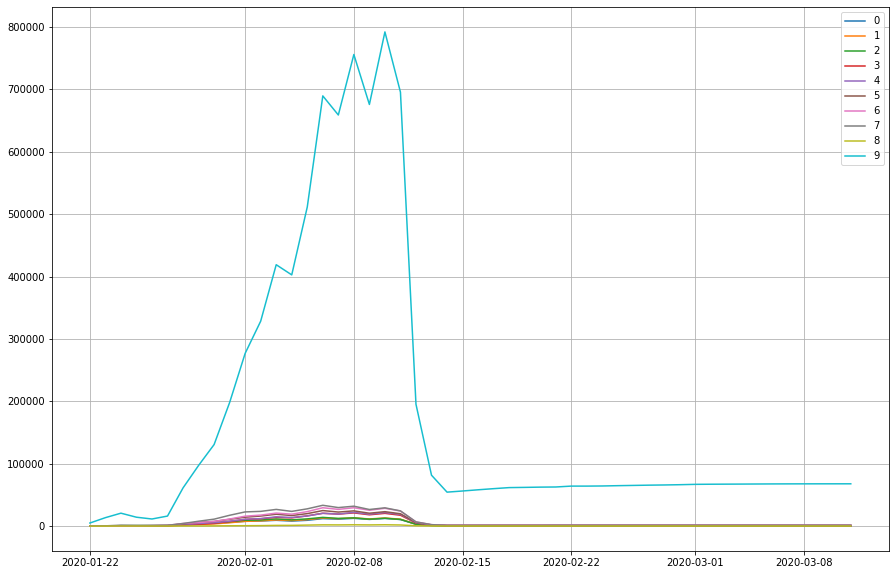

In [404]:
plt.figure(figsize=(15,10))
plt.grid(True)
for i,x in enumerate(List):
    plt.plot(x, label = i)
plt.legend()

Since Hubei has a large number of cases we exclude Hubei. 

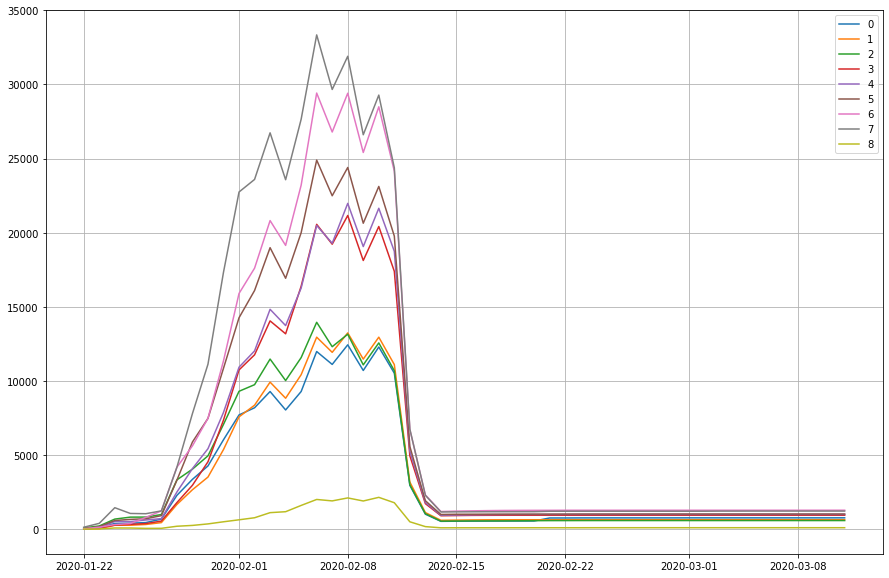

In [405]:
plt.figure(figsize=(15,10))
plt.grid(True)
for i,x in enumerate(List[:9]):
    plt.plot(x, label = i)
plt.legend()

All provinces seem to grow at the same rate, so we will just choose the top five with the most cases: Hunan, Henan, Zhejiang, Jilin, Hubei.

## Trend and Seasonality 

In [406]:
list_provinces = [Hunan_df,Henan_df,Guangdong_df,Zhejiang_df,Hubei_df]
provinces_dict = {'Hunan': Hunan_df,
                 'Henan': Henan_df,
                 'Guangdong': Guangdong_df,
                 'Zhejiang': Zhejiang_df,
                 'Hubei': Hubei_df}

In [407]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonality(df, column_of_graph, frequency):
    '''
    parameters: df <dataframe>, column_of_graph <int> which column your graphs should take,
                frequency <int> 
    returns: trend, seasonality and noise of decomposed object on three consecutive axes.
    '''
    decomposition = seasonal_decompose(df, freq = frequency)
    
    decomposition.trend.plot(ax=axes[0][column_of_graph])
    axes[0][column_of_graph].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[1][column_of_graph])
    axes[1][column_of_graph].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[2][column_of_graph])
    axes[2][column_of_graph].set_ylabel('Residual')

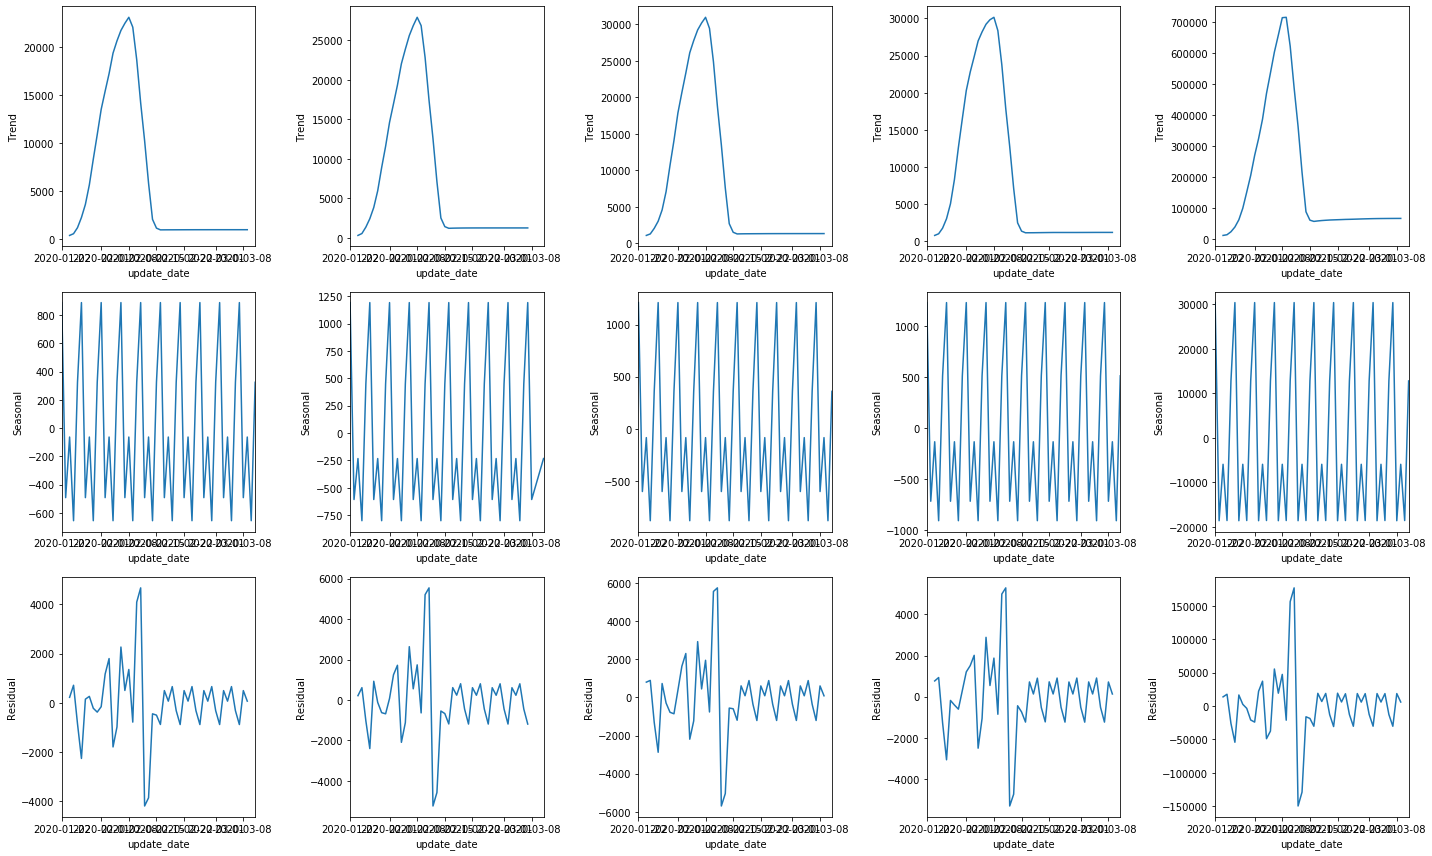

In [408]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3,5, figsize=(20,12))
for i, df in enumerate(list_provinces): 
    seasonality(df, i, 5)
fig.tight_layout()
plt.show()   

## Stationary Test

In [409]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [410]:
#ADF test
def ADF_test(df):
    '''
    parameters: df <dataframe>
    returns: stationary or non stationary using ADF test
    '''
    X = df['confirmed_cases'].values
    result = adfuller(X)

    print('ADF statistic:', result[0])
    print('p-value:',  result[1])
    print('critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))

    #reject null-hypothesis for critical value .05
    if result[0]< result[4]['5%']:
        print('stationary')
    else:
        print('non-stationary')

In [411]:
for key, value in provinces_dict.items():
    print(key)
    ADF_test(value)
    print('---------------------------')

Hunan
ADF statistic: -1.5856822880503298
p-value: 0.49078167793404887
critical values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
non-stationary
---------------------------
Henan
ADF statistic: -1.639919939899415
p-value: 0.4623026268675926
critical values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
non-stationary
---------------------------
Guangdong
ADF statistic: -1.5837612542630537
p-value: 0.4917454417464244
critical values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
non-stationary
---------------------------
Zhejiang
ADF statistic: -1.5968811728408636
p-value: 0.4851599879430026
critical values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
non-stationary
---------------------------
Hubei
ADF statistic: -1.8891672666213384
p-value: 0.3371742048902666
critical values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
non-stationary
---------------------------


In [412]:
indexed_data = China_df.set_index(['update_time'])

In [413]:
China_df['hour'] = China_df['update_time'].dt.hour

In [414]:
def rolling(df, x, n):
    df[x] = df['confirmed_cases'].rolling(n, center = True).mean()

for df in list_provinces:
    rolling(df, 'MA_7', 7)
    rolling(df, 'MA_10', 10)

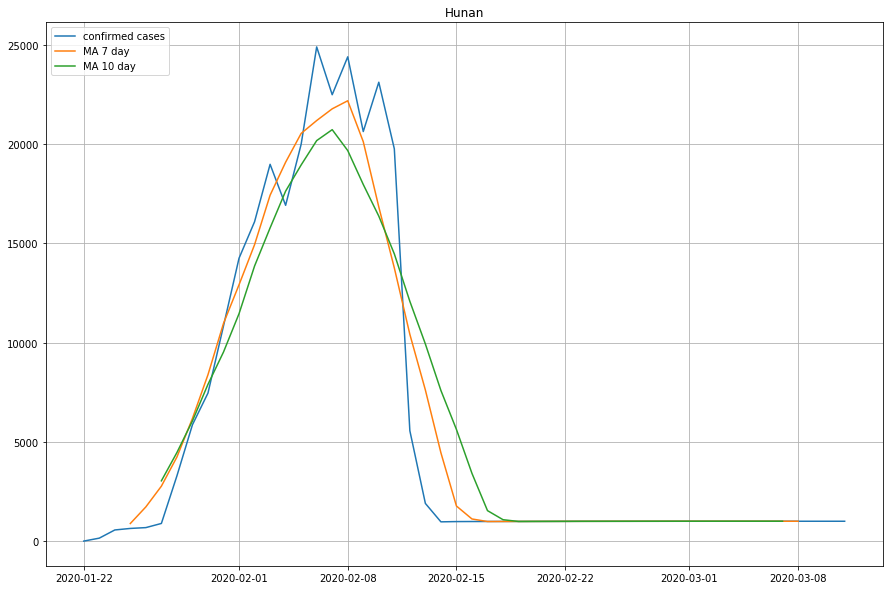

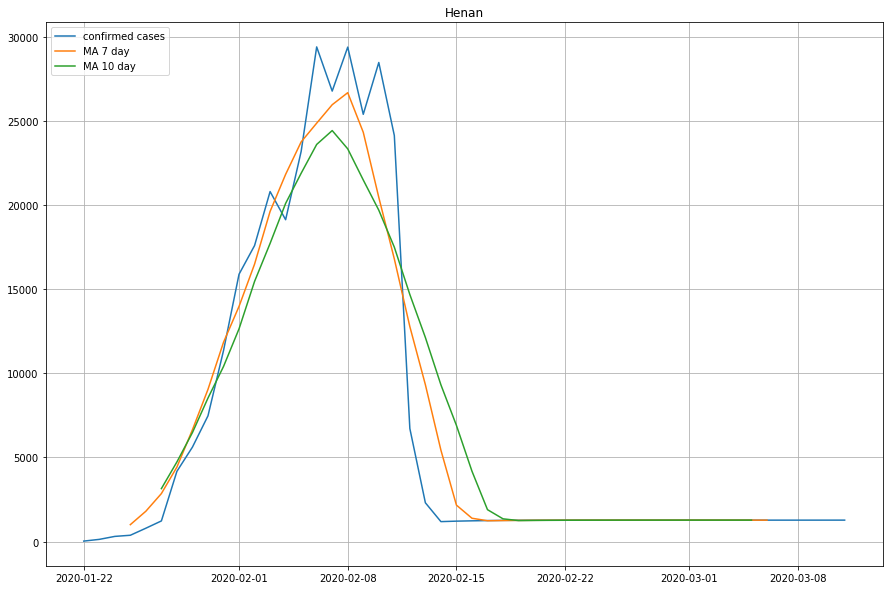

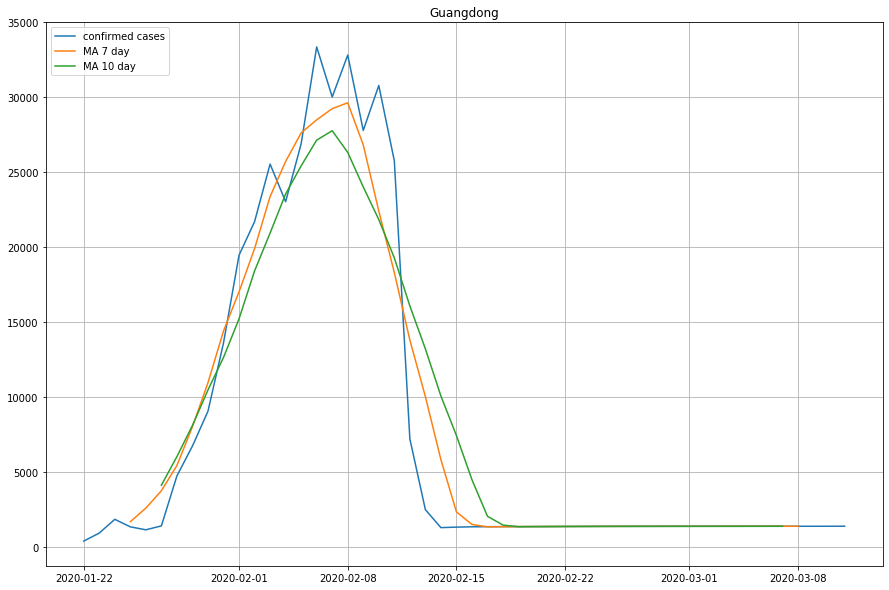

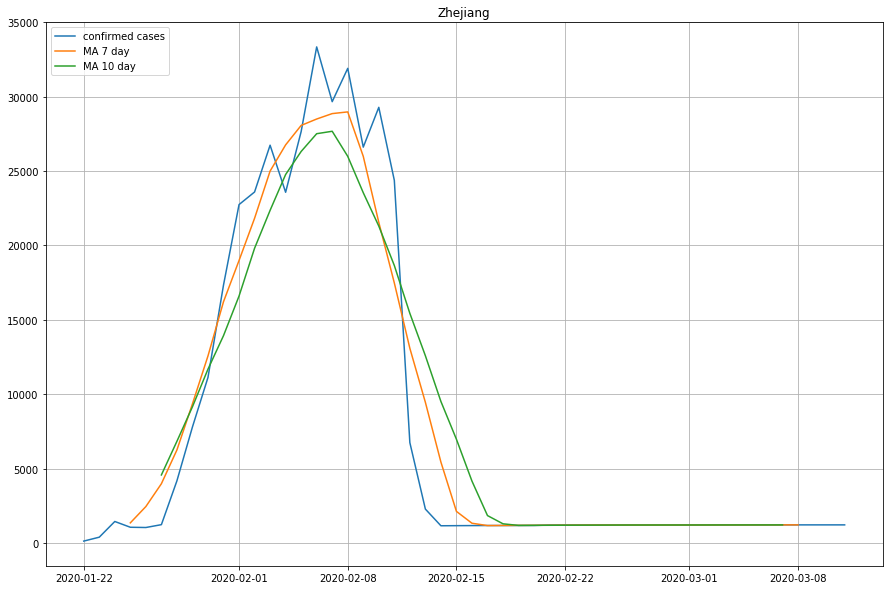

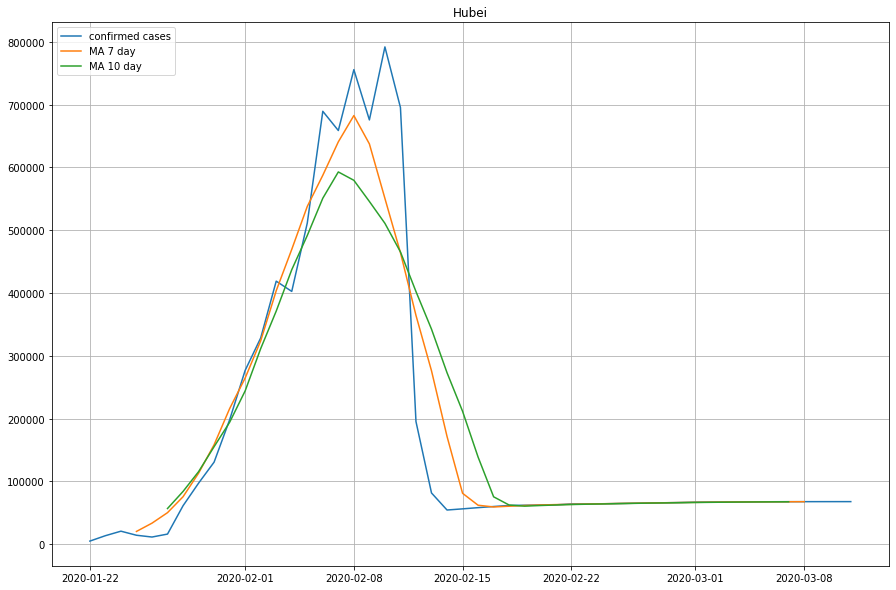

In [415]:
for key, df in provinces_dict.items():
    plt.figure(figsize=(15,10))
    plt.grid(True)
    plt.title(key)
    plt.plot(df['confirmed_cases'], label = 'confirmed cases')
    plt.plot(df['MA_7'], label = 'MA 7 day')
    plt.plot(df['MA_10'], label = 'MA 10 day')
    plt.legend(loc=2)

## Autocorrelation 

In [416]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from matplotlib.pylab import rcParams

def autocorrelation(df, lags, col):
    plot_acf(df, lags=lags, ax=ax[0][col])
    plot_pacf(df, lags=lags, ax=ax[1][col])

In [417]:
for df in list_provinces:
    df.drop(['MA_7', 'MA_10'], axis =1, inplace =True)

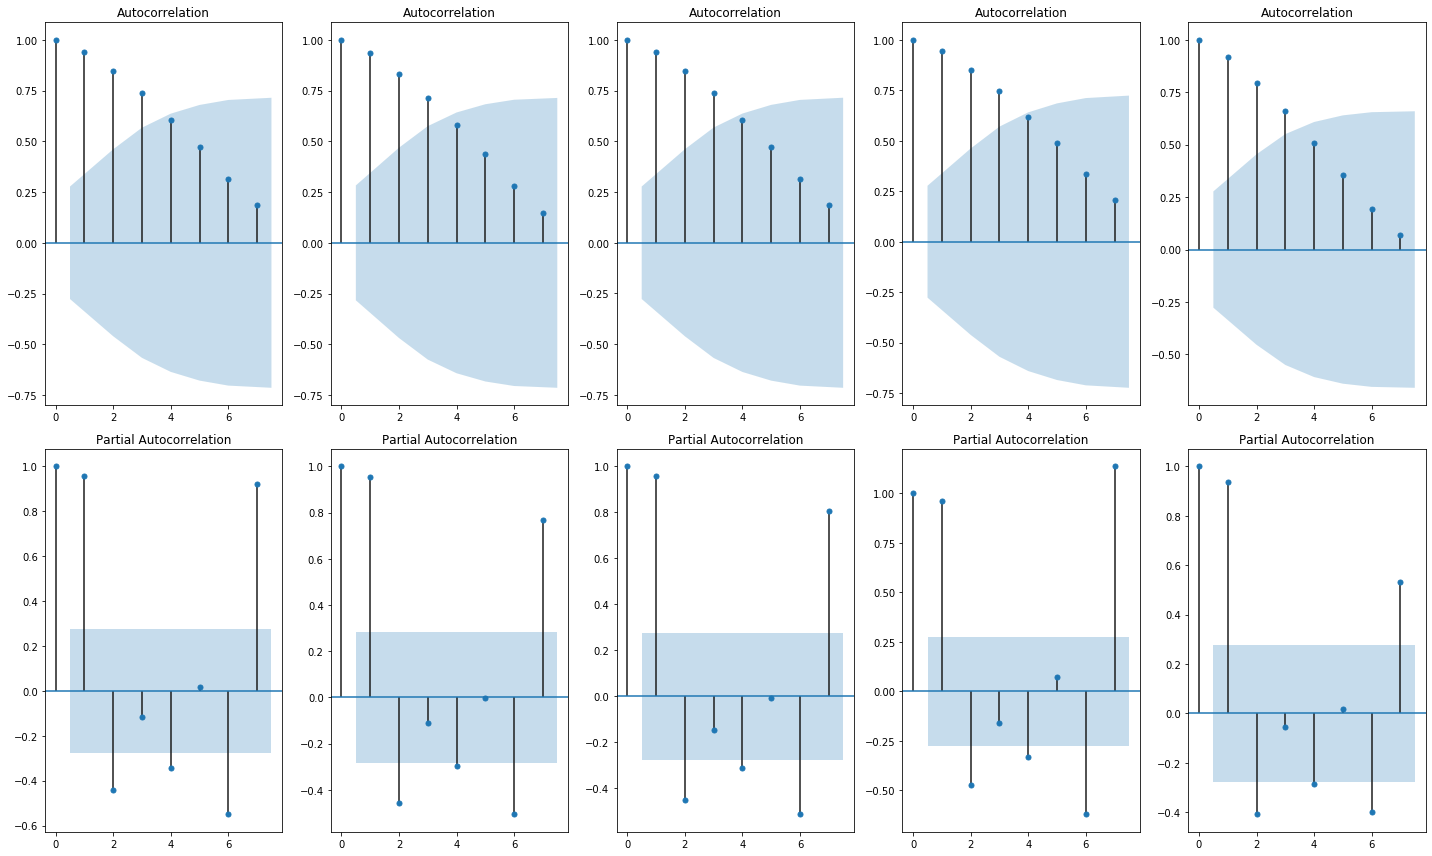

In [418]:
fig,ax = plt.subplots(2,5,figsize=(20,12))

for i, df in enumerate(list_provinces): 
    autocorrelation(df, 7 , i)
fig.tight_layout()
plt.show() 

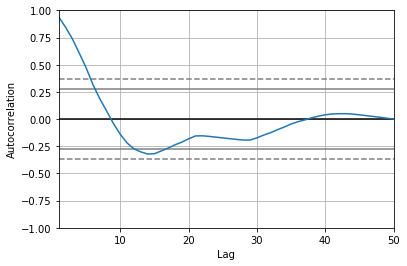

In [419]:
pd.plotting.autocorrelation_plot(Hunan_df)

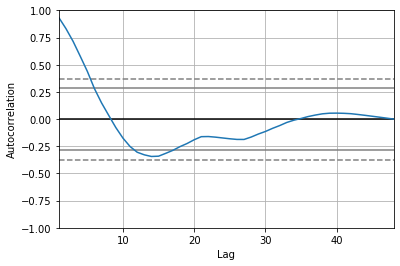

In [420]:
pd.plotting.autocorrelation_plot(Henan_df)

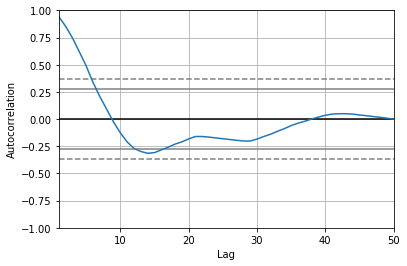

In [421]:
pd.plotting.autocorrelation_plot(Zhejiang_df)

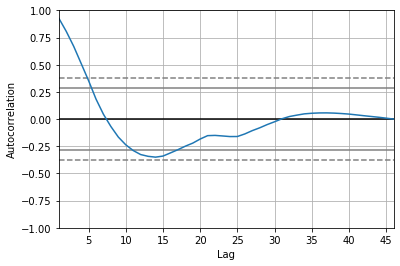

In [422]:
pd.plotting.autocorrelation_plot(Jilin_df)

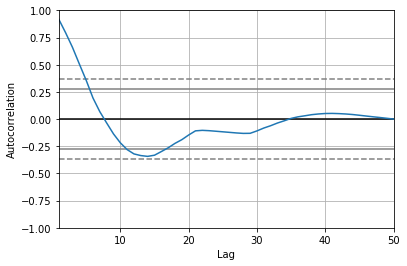

In [423]:
pd.plotting.autocorrelation_plot(Hubei_df)

In [424]:
from sklearn.metrics import mean_squared_error
import pmdarima as pm

def arima_model(train, test):
    model = pm.auto_arima(train, trace=True,error_action='ignore', suppress_warnings=True)
    model.fit(train)

    print(model.summary())
    model.plot_diagnostics(figsize=(8, 8))
    plt.show()
    forecast1 = model.predict(n_periods=len(test))
    forecast1 = pd.DataFrame(forecast1,index = test.index,columns=['Prediction'])

    #plot the predictions for test set
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast1, label='Prediction')
    plt.show();

    test['predicted_value']=forecast1
    test.head()


    MSE = mean_squared_error(test.confirmed_cases, test.predicted_value)
    print ('MSE: {}'.format(MSE))


In [425]:
#Hunan_df,Henan_df,Guangdong_df,Zhejiang_df,Hubei_df

In [426]:
def train_test(df):
    train = df.head(int(len(df)*(70/100)))
    test = df.tail(int(len(df)*(30/100)))
    return (train,test)

In [427]:
Hunan_train, Hunan_test = train_test(Hunan_df)
Henan_train, Henan_test = train_test(Henan_df)
Guangdong_train, Guangdong_test = train_test(Guangdong_df)
Zhejiang_train, Zhejiang_test = train_test(Zhejiang_df)
Hubei_train, Hubei_test = train_test(Hubei_df)

In [428]:
train_list = []
test_list = []

for df in list_provinces:
    train_list.append(train_test(df)[0])
    test_list.append(train_test(df)[1])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=739.483, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=670.358, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=757.459, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=668.300, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=669.888, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=668.997, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=667.136, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=668.699, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=668.953, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=668.347, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=667.799, Time=0.02 se

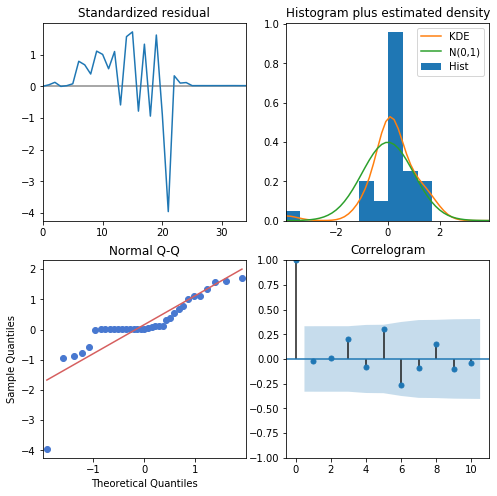

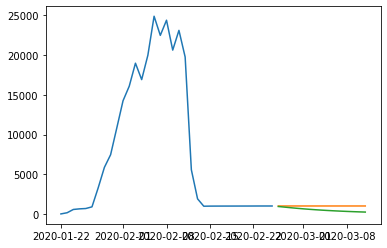

MSE: 279395.71718984906
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=709.459, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=646.936, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=726.858, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=644.742, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=646.399, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=646.539, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=645.517, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=648.178, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=643.644, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=645.286, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=645.525, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=645.182, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]        

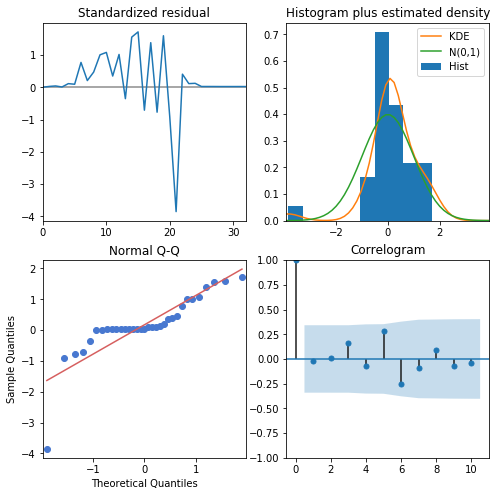

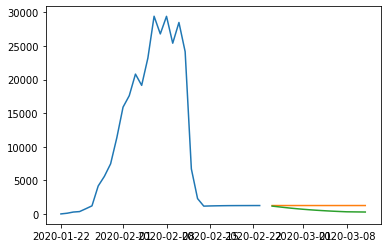

MSE: 443666.9187283778
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=759.620, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=690.177, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=777.706, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=687.890, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=689.243, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=688.880, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=690.665, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=686.774, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=688.556, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=688.417, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=687.872, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             

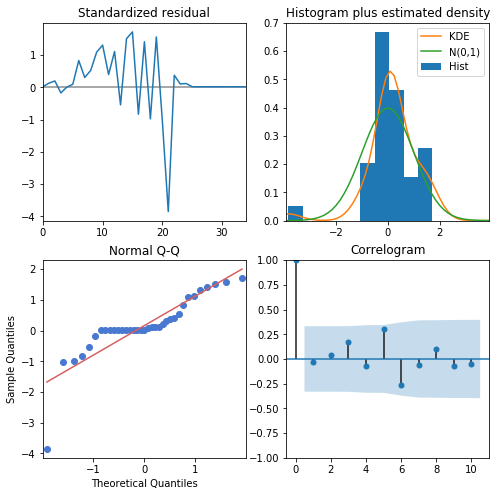

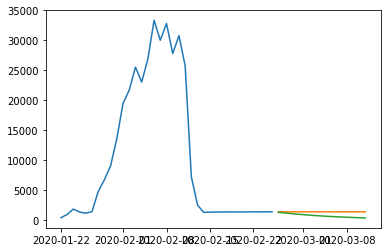

MSE: 496349.5666233496
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=760.361, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=688.843, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=778.528, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=686.328, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=687.533, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=682.154, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=687.128, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=688.888, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=688.718, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=693.539, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=686.067, Time=0.03 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.713 seconds
                    

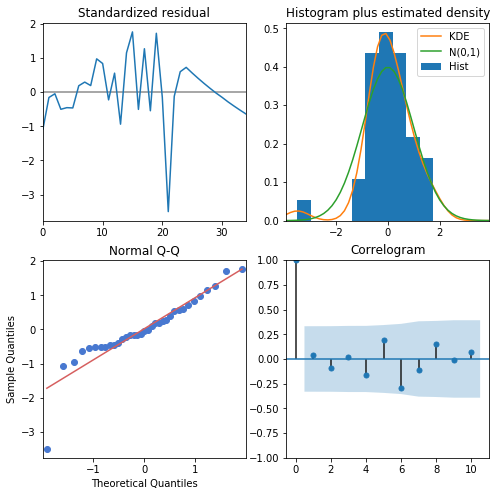

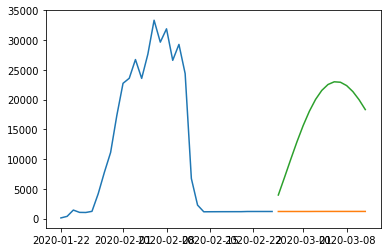

MSE: 294227455.8031661
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=913.849, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=974.525, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=914.315, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=952.168, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=992.429, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=915.480, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=914.401, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=914.893, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=916.658, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=912.659, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=950.147, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=912.260, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=914.196, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=912.878, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] 

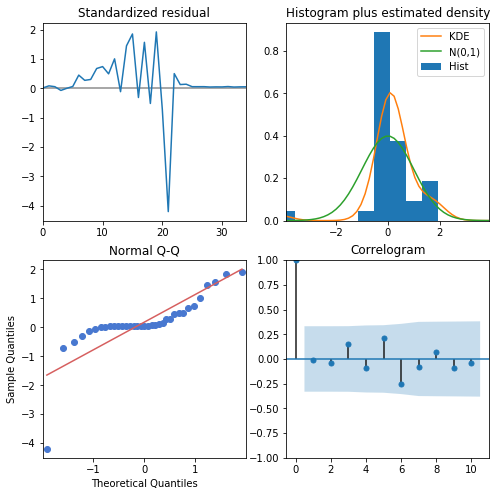

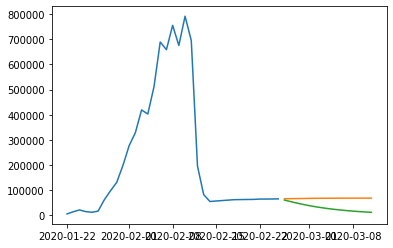

MSE: 1634289248.5053706


In [429]:
for train, test in zip(train_list, test_list):
    arima_model(train, test)

In [430]:
from statsmodels.tsa.arima_model import ARIMA

In [431]:
def forecast_graph(train,test,n):
    model = ARIMA(train, order=(1, 1, 1))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc, se, conf = fitted.forecast(n, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    

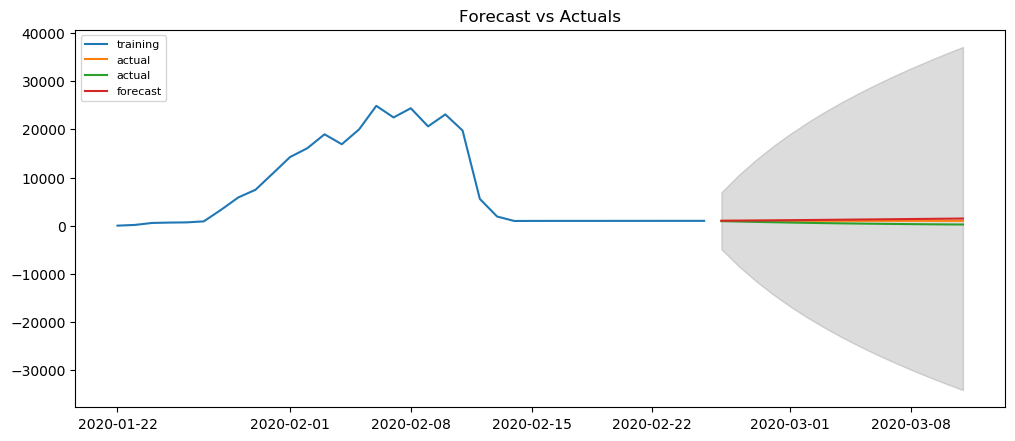

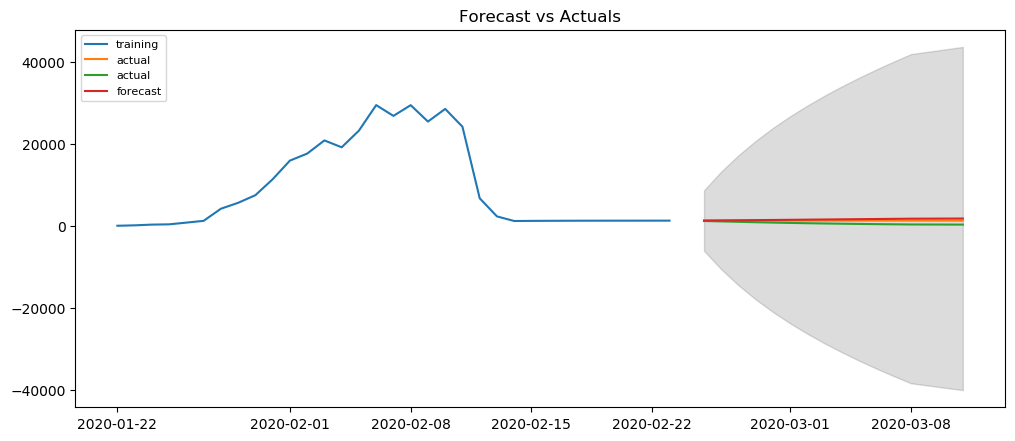

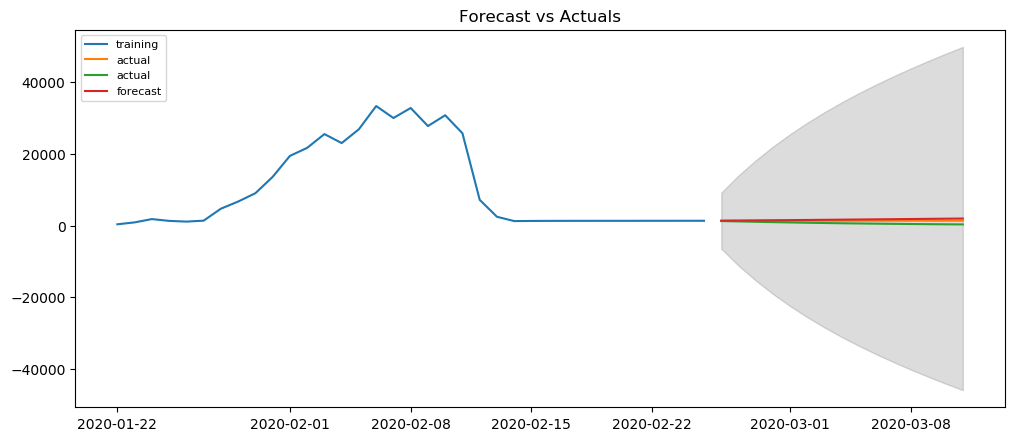

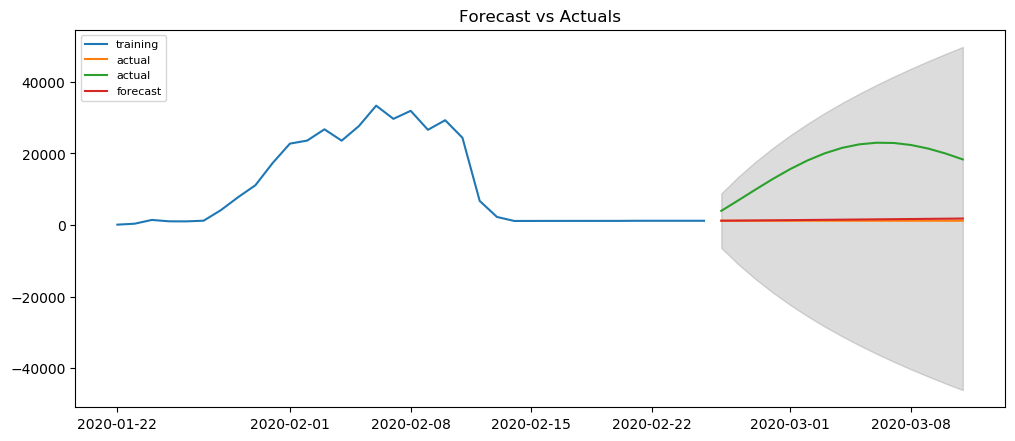

In [432]:
for train,test in zip(train_list[:4], test_list[:4]):
    forecast_graph(train,test,len(test.index))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=739.483, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=670.358, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=757.459, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=668.300, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=669.888, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=668.997, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=667.136, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=668.699, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=668.953, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=668.347, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=667.799, Time=0.02 se

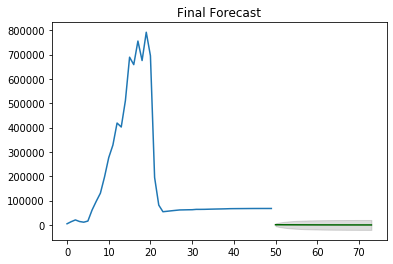

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=709.459, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=646.936, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=726.858, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=644.742, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=646.399, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=646.539, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=645.517, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=648.178, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=643.644, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=645.286, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=645.525, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=645.182, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=644.358, Time

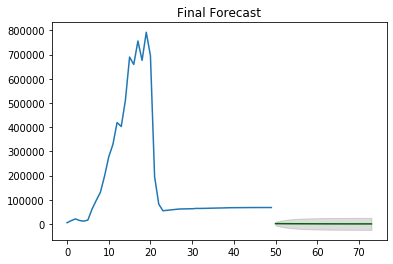

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=759.620, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=690.177, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=777.706, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=687.890, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=689.243, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=688.880, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=690.665, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=686.774, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=688.556, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=688.417, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=687.872, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=687.672, Time=0.0

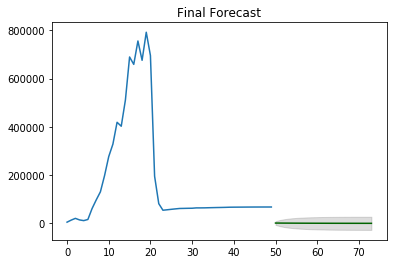

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=760.361, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=688.843, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=778.528, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=686.328, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=687.533, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=682.154, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=687.128, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=688.888, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=688.718, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=693.539, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=686.067, Time=0.03 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 0.802 seconds


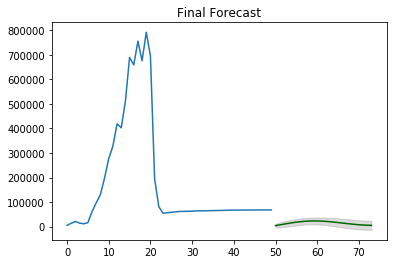

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=913.849, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=974.525, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=914.315, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=952.168, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=992.429, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=915.480, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=914.401, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=914.893, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=916.658, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=912.659, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=950.147, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=912.260, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=914.196, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=912.878, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=911.5

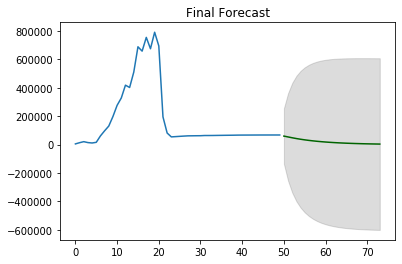

In [433]:
for train,test in zip(train_list, test_list):
    model = pm.auto_arima(train, trace=True,error_action='ignore', suppress_warnings=True)
    #model.fit(train)
    # Forecast
    n_periods = 24
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(df.values)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

    plt.title("Final Forecast")
    plt.show()

## FB PROPHET PRACTICE

In [434]:
def renaming(df):
    df.reset_index(inplace = True)
    df.rename(columns={'update_date':'ds','confirmed_cases': 'y'}, inplace = True)
    
for df in list_provinces:
    renaming(df)

In [435]:
df.head()

,ds,y
0,2020-01-22,4914
1,2020-01-23,13518
2,2020-01-24,20694
3,2020-01-25,14224
4,2020-01-26,11373


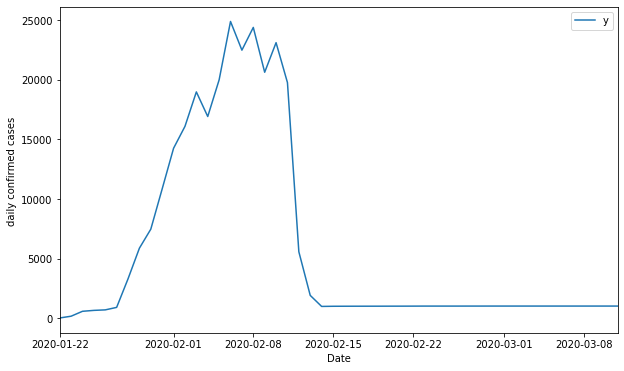

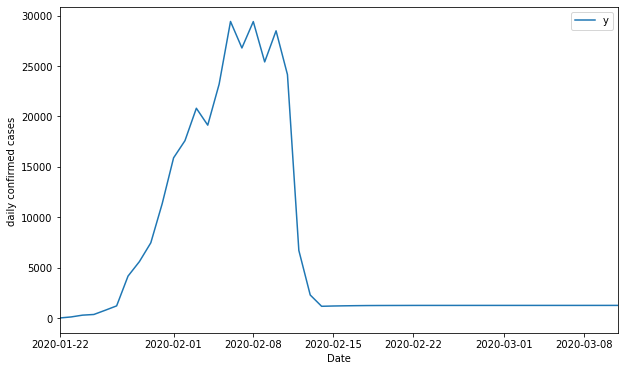

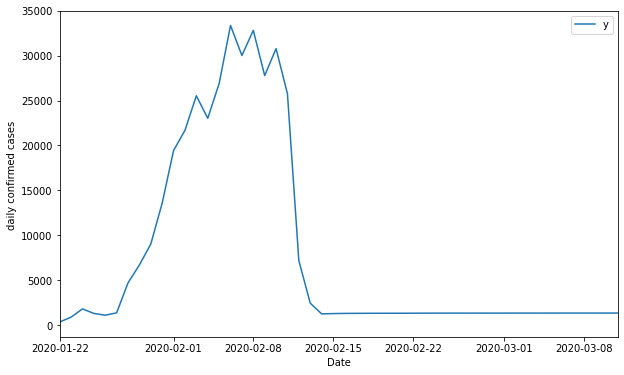

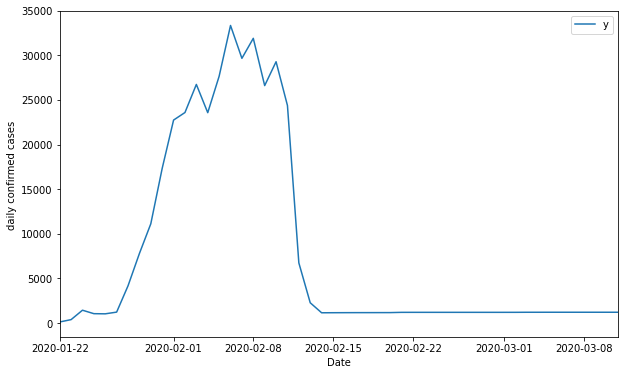

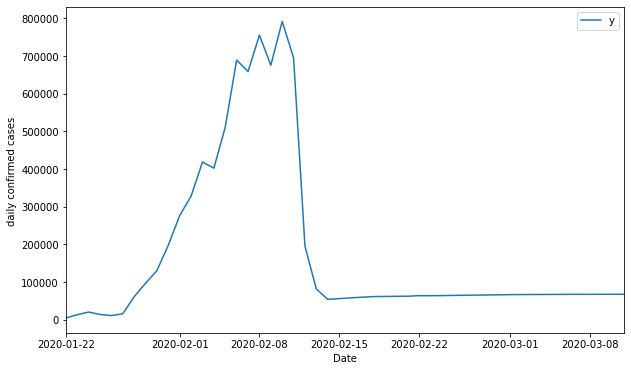

In [436]:
for df in list_provinces:
    ax = df.set_index('ds').plot(figsize=(10, 6))
    ax.set_ylabel('daily confirmed cases ')
    ax.set_xlabel('Date')

plt.show()

We don't have enough data for fbprophet since the time interval was every several hours not by days our data had shortened significantly. We can make our data longer by looking at update by hours. But to save time we will just demonstrate the basics of how to use fbprophet below with an example csv. 

In [437]:
df = pd.read_csv('example.csv')

In [438]:
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


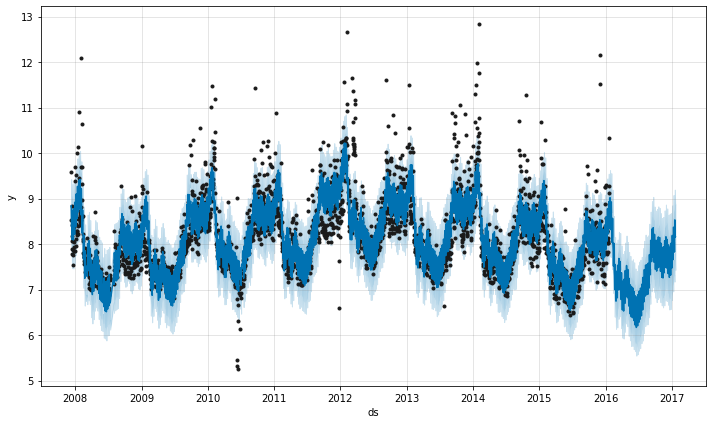

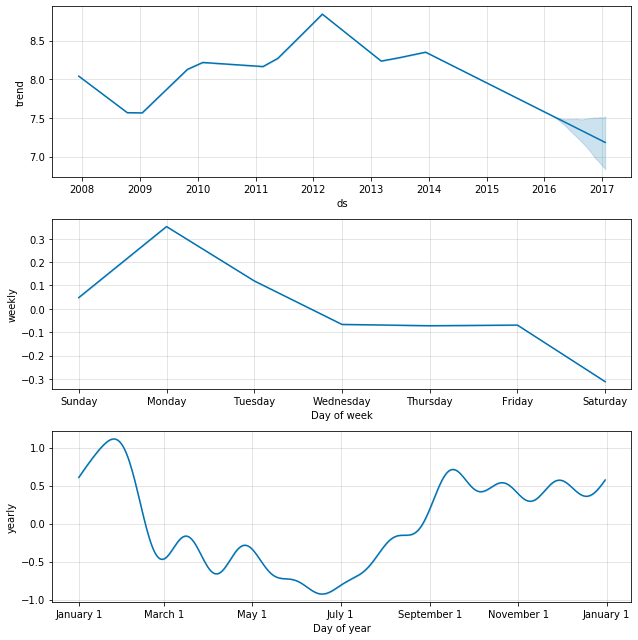

In [439]:
m= Prophet()
m.fit(df)
    
#get future dates/ forecast
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
    
#plot
m.plot(forecast)
m.plot_components(forecast)
    
plot_plotly(m, forecast)
plot_components_plotly(m, forecast)
    

In [440]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041239,8.268661,9.426703,8.041239,8.041239,0.802931,0.802931,0.802931,0.352295,0.352295,0.352295,0.450636,0.450636,0.450636,0.0,0.0,0.0,8.844170
1,2007-12-11,8.039695,7.975991,9.201559,8.039695,8.039695,0.553003,0.553003,0.553003,0.119639,0.119639,0.119639,0.433364,0.433364,0.433364,0.0,0.0,0.0,8.592697
2,2007-12-12,8.038151,7.791093,9.030809,8.038151,8.038151,0.350363,0.350363,0.350363,-0.066664,-0.066664,-0.066664,0.417027,0.417027,0.417027,0.0,0.0,0.0,8.388514
3,2007-12-13,8.036607,7.773103,9.075730,8.036607,8.036607,0.329817,0.329817,0.329817,-0.072254,-0.072254,-0.072254,0.402070,0.402070,0.402070,0.0,0.0,0.0,8.366423
4,2007-12-14,8.035063,7.702830,9.001484,8.035063,8.035063,0.319321,0.319321,0.319321,-0.069578,-0.069578,-0.069578,0.388900,0.388900,0.388900,0.0,0.0,0.0,8.354384


In [441]:
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
metric_df = forecast_df.set_index('ds')[['yhat']].join(df.set_index('ds')[['y']])

#drop nan 
metric_df.dropna(inplace = True)
mse = mean_squared_error(metric_df.y, metric_df.yhat)
mae = mean_absolute_error(metric_df.y, metric_df.yhat)
print('mse:', mse)
print('mae:', mae)

mse: 0.2339916034950024
mae: 0.33569535810632656


## CONCLUSION

The goal of this project was to attain practice in using ARIMA and learn about time series. The data chosen was not a very good data for time series, as you've seen, We've grouped the data by days hence theres not much data. There aren't many things which make the date 'nice' to perform a time series model on (such as trend or seasonality...). However the data itself was interesting. 

The lockdown in China (learned from speaking to intsructor Lindsey Berlin as well as articles) was very strict. There was more testing available than that of say US. The data indicates that the number of cases has significantly dropped since its initial outbreak. Given that there were no vaccines in March 2020 this shows that a deadly outbreak of COVID can be minimized via government regulations. We would make the recommendation that we learn from China and the methods they took to minimize the outbeak so that we can implement those methods for countries with large outbreaks today. 